In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing, metrics

# Part 1
Build a binary classifier model to predict the CVD Risk (Yes/No, or 1/0) using a Logistic Regression Model with the best performance possible

In [2]:
cvd_data = pd.read_csv('https://github.com/ArinB/CA05-B-Logistic-Regression/raw/master/cvd_data.csv')
cvd_data.head()
#read csv data and show first few rows

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
0,0,54,1,2,1,110.0,40.0,108.0,87.5,34.0,0,1,0,1,2,3,4
1,0,56,3,2,1,113.0,34.0,107.0,83.5,0.0,0,0,0,2,2,1,3
2,0,54,1,3,1,110.0,44.5,105.0,86.2,49.5,0,0,0,3,2,6,4
3,0,54,1,3,1,129.0,42.5,110.0,89.1,0.0,0,0,0,3,2,1,3
4,0,51,3,2,1,122.0,37.0,113.0,81.3,0.0,0,0,0,2,1,1,2


In [0]:
scaler = preprocessing.MinMaxScaler()
#set the scaler to a variable which will be used later

In [0]:
X_scaled = scaler.fit_transform(cvd_data.drop('cvd_4types', axis=1))
#normalize the other numbers aside from cvd_4types to 0 to 1

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, cvd_data['cvd_4types'], test_size = 0.3, random_state=np.random)
#split to train and test sets and use scaled X values and cvd_4types as y
#randomize the random_state

In [6]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#fit the train values into logistic regression without any parameter tuning

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
#to get the best possible result, we need to tune the hyperparameters
C = np.logspace(0, 2, num=100)
#set the regularization strength as positive float from 0 to 2

solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
#set the possible solvers for the algorithm to use to optimize the problem

hyperparameters = dict(C=C, solver=solver)
#put the values in a dict for hyperparameter

In [0]:
clf = GridSearchCV(logreg, hyperparameters, cv=5)
#GridSearch is then used to find the optimal combination of C and solver

In [9]:
best_model = clf.fit(X_train, y_train)
print('Best solver: ', best_model.best_estimator_.get_params()['solver'])
print('Best C: ', best_model.best_estimator_.get_params()['C'])
#fits the train data to the best model and prints the best C and solver

Best solver:  lbfgs
Best C:  11.768119524349984


In [10]:
logreg = LogisticRegression(C=best_model.best_estimator_.get_params()['C'], solver=best_model.best_estimator_.get_params()['solver'], random_state=np.random)
logreg.fit(X_train, y_train)
y_pred = logreg.predict (X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
#use the best solver type and C obtained above to fit the dataset again
#predict y and print the accuracy using the best C and best solver

0.6937307297019527


# Part 2
Display the Feature Importance of all the features sorted in the order of decreasing influence on the CVD Risk

In [11]:
feature_name = list(cvd_data)[1:]
print(feature_name)
#set the names of the features in a list and print them

feature_coef = logreg.coef_[0]
print(feature_coef)
#set the coefficients of the feature importance of each feature names and print

feature_importance = pd.Series(logreg.coef_[0], index=feature_name)
feature_importance.sort_values(ascending=False)
#rearrange the features by descending order of importance

['age_s1', 'race', 'educat', 'mstat', 'hip', 'neck20', 'waist', 'av_weight_kg', 'cgpkyr', 'tea15', 'srhype', 'parrptdiab', 'bend25', 'happy25', 'tired25', 'hlthlm25']
[ 0.14640586 -2.00412375  0.85477808 -0.97662291 -6.48368908 -1.18837396
  5.26536892 -2.01959365  0.12151932 -2.12603026  0.1203633   0.68155351
  0.31830534 -0.40266624  0.44655397 -2.50182534]


waist           5.265369
educat          0.854778
parrptdiab      0.681554
tired25         0.446554
bend25          0.318305
age_s1          0.146406
cgpkyr          0.121519
srhype          0.120363
happy25        -0.402666
mstat          -0.976623
neck20         -1.188374
race           -2.004124
av_weight_kg   -2.019594
tea15          -2.126030
hlthlm25       -2.501825
hip            -6.483689
dtype: float64

As can be seen by the data shown above, waist has the highest feature importance according to other variables in the dataset, followed by Education.
However, it is hard to believe that both these factors would be the top determinants of a person getting Cardiovascular Disease (CVD), compared to other variables. As such, there may be a lot of other factors to consider in this model and some assumptions made in order for the model to function before blindly trusting the results. Furthermore, it is shown that the accuracy of the model varies between 0.69 to 0.72 (variance caused by np.random).

# Part 3
Evaluate the performance of your model (including ROC Curve), explain the performance and draw a meaningful conclusion.

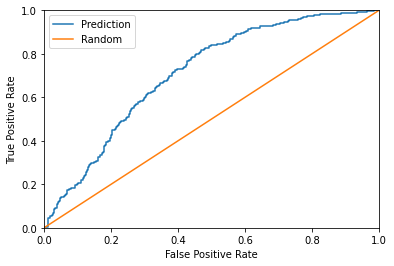

In [12]:
y_pred_score = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_score)
metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label = 'Prediction')
plt.plot([0, 1], [0, 1], label = 'Random')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()
#plot the roc curve and the random line

In [13]:
auc_score = roc_auc_score(y_test, y_pred_score)
print(auc_score)
#print the auc score of the model

0.7107094163697937
